In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras import callbacks


TensorFlow version: 2.2.0


In [2]:
xTemp = np.zeros((1060, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\TrainingA_1-1060.npy", 'rb') as f1:
        xTemp = np.load(f1)


In [3]:
yTemp = np.zeros((1060))
for i in range (1060):
    if (i%2==0):
        yTemp[i] = 0
    else:
        yTemp[i] = 1


In [4]:
x = np.zeros((1060, 6, 340, 444))
y = np.zeros((1060))

permutations = np.random.permutation(1060)
for i in range (1060):
    x[i] = xTemp[permutations[i]]
    y[i] = yTemp[permutations[i]]

In [5]:
x = np.reshape(x, (1060, 340, 444, 6))


In [6]:
print (x.shape)

(1060, 340, 444, 6)


In [7]:
y = y.astype(int)

In [8]:
print (y[1])

1


In [9]:
img_shape = (340, 444, 6)


In [16]:
img = layers.Input(shape=img_shape)

conv1 = layers.Conv2D(64, (5, 5), padding='same', activation='relu', strides=5)(img)
bn1 = layers.BatchNormalization()(conv1)
maxPooling1 = layers.MaxPooling2D(padding='same')(bn1)

conv2 = layers.Conv2D(32, (5, 5), padding='same', activation='elu', strides=5)(maxPooling1)
bn2 = layers.BatchNormalization()(conv2)
maxPooling2 = layers.MaxPooling2D(padding='same')(bn2)

conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='elu', strides=3)(maxPooling2)
bn3 = layers.BatchNormalization()(conv3)
maxPooling3 = layers.MaxPooling2D(padding='same')(bn3)

conv4 = layers.Conv2D(64, (3, 3), padding='same', activation='elu', strides=3)(maxPooling3)
bn4 = layers.BatchNormalization()(conv4)
maxPooling4 = layers.MaxPooling2D(padding='same')(bn4)

conv5 = layers.Conv2D(128, (3, 3), padding='same', activation='elu', strides=3)(maxPooling4)
maxPooling5 = layers.MaxPooling2D(padding='same')(conv5)

flatten = layers.Flatten()(maxPooling5)

dense1 = layers.Dense(128, activation = "relu")(flatten)
drop2 = layers.Dropout(0.5)(dense1)
res = layers.Dense(1, activation='sigmoid')(drop2)

model = Model(img, res)
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x, y, batch_size = 8, epochs = 11)


Epoch 1/11
133/133 [==============================] - 12s 87ms/step - loss: 0.6782 - accuracy: 0.5811
Epoch 2/11
133/133 [==============================] - 11s 84ms/step - loss: 0.6019 - accuracy: 0.6774
Epoch 3/11
133/133 [==============================] - 11s 83ms/step - loss: 0.5305 - accuracy: 0.72920s - loss: 0.5
Epoch 4/11
133/133 [==============================] - 11s 84ms/step - loss: 0.4890 - accuracy: 0.7566
Epoch 5/11
133/133 [==============================] - 11s 83ms/step - loss: 0.4149 - accuracy: 0.8170
Epoch 6/11
133/133 [==============================] - 11s 82ms/step - loss: 0.3769 - accuracy: 0.8358
Epoch 7/11
133/133 [==============================] - 11s 82ms/step - loss: 0.3326 - accuracy: 0.8519
Epoch 8/11
133/133 [==============================] - 11s 83ms/step - loss: 0.3011 - accuracy: 0.87552s - loss: 0.297
Epoch 9/11
133/133 [==============================] - 11s 83ms/step - loss: 0.2441 - accuracy: 0.8868
Epoch 10/11
133/133 [==============================]

In [19]:
model.save_weights("Model2TrainingA-V2.hdf5")

In [18]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 340, 444, 6)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 68, 89, 64)        9664      
_________________________________________________________________
batch_normalization_12 (Batc (None, 68, 89, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 34, 45, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 9, 32)          51232     
_________________________________________________________________
batch_normalization_13 (Batc (None, 7, 9, 32)          128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 5, 32)          0   

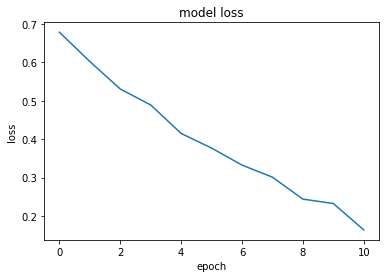

In [20]:
from matplotlib import pyplot as plt
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])